In [40]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('premier-league-matches.csv')

# Display the first few rows of the DataFrame
df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [41]:
df.tail()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A
12025,2023,38,2023-05-28,Brentford,1,0,Manchester City,H


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  12026 non-null  int64 
 1   Wk               12026 non-null  int64 
 2   Date             12026 non-null  object
 3   Home             12026 non-null  object
 4   HomeGoals        12026 non-null  int64 
 5   AwayGoals        12026 non-null  int64 
 6   Away             12026 non-null  object
 7   FTR              12026 non-null  object
dtypes: int64(4), object(4)
memory usage: 751.8+ KB


In [43]:
print(df.isnull().sum())

Season_End_Year    0
Wk                 0
Date               0
Home               0
HomeGoals          0
AwayGoals          0
Away               0
FTR                0
dtype: int64


In [44]:
df_copy = df.copy()

In [45]:
irrelevant_columns = ['Season_End_Year', 'Wk', 'Date']

# Remove irrelevant columns from the copied dataset
df_copy.drop(columns=irrelevant_columns, inplace=True)


print(df_copy.head())

             Home  HomeGoals  AwayGoals            Away FTR
0   Coventry City          2          1   Middlesbrough   H
1    Leeds United          2          1       Wimbledon   H
2   Sheffield Utd          2          1  Manchester Utd   H
3  Crystal Palace          3          3       Blackburn   D
4         Arsenal          2          4    Norwich City   A


In [48]:
import pandas as pd

# List of team names
team_names = ['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn', 'Norwich City',
              'Aston Villa', 'Sheffield Weds', 'Tottenham', 'Oldham Athletic', 'Liverpool',
              'QPR', 'Arsenal', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
              'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea', 'Southampton',
              'Everton', "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
              'Leicester City', 'Bolton', 'Derby County', 'Sunderland', 'Barnsley',
              'Charlton Ath', 'Bradford City', 'Watford', 'Fulham', 'West Brom',
              'Birmingham City', 'Wolves', 'Portsmouth', 'Wigan Athletic', 'Reading',
              'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
              'Cardiff City', 'Bournemouth', 'Huddersfield', 'Brighton', 'Brentford']

# Create DataFrame with team names as columns using one-hot encoding
for team in team_names:
    df_copy[f'{team}Home'] = (df_copy['Home'] == team).astype(int)
    df_copy[f'{team}Away'] = (df_copy['Away'] == team).astype(int)


print(df_copy)

                 Home  HomeGoals  AwayGoals             Away  FTR  \
0       Coventry City          2          1    Middlesbrough    2   
1        Leeds United          2          1        Wimbledon    2   
2       Sheffield Utd          2          1   Manchester Utd    2   
3      Crystal Palace          3          3        Blackburn    1   
4             Arsenal          2          4     Norwich City    0   
...               ...        ...        ...              ...  ...   
12021         Everton          1          0      Bournemouth    2   
12022  Leicester City          2          1         West Ham    2   
12023     Aston Villa          2          1         Brighton    2   
12024    Leeds United          1          4        Tottenham    0   
12025       Brentford          1          0  Manchester City    2   

       MiddlesbroughHome  MiddlesbroughAway  WimbledonHome  WimbledonAway  \
0                      0                  1              0              0   
1                

In [49]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'FTR' column in df_copy
df_copy['FTR'] = label_encoder.fit_transform(df_copy['FTR'])

# Print the mapping of original categories to numerical values
print("Mapping of original categories to numerical values:")
for category, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {numerical_value}")

Mapping of original categories to numerical values:
0: 0
1: 1
2: 2


In [50]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Columns: 105 entries, Home to BrentfordAway
dtypes: int64(103), object(2)
memory usage: 9.6+ MB


In [51]:
df_copy.drop(columns=['Home', 'Away'], inplace=True)

print(df_copy.head())

   HomeGoals  AwayGoals  FTR  MiddlesbroughHome  MiddlesbroughAway  \
0          2          1    2                  0                  1   
1          2          1    2                  0                  0   
2          2          1    2                  0                  0   
3          3          3    1                  0                  0   
4          2          4    0                  0                  0   

   WimbledonHome  WimbledonAway  Manchester UtdHome  Manchester UtdAway  \
0              0              0                   0                   0   
1              0              1                   0                   0   
2              0              0                   0                   1   
3              0              0                   0                   0   
4              0              0                   0                   0   

   BlackburnHome  ...  Cardiff CityHome  Cardiff CityAway  BournemouthHome  \
0              0  ...                 0           

In [ ]:
## Just go with the simple ones for now. LR, RF.

## Split data into training and testing sets 80/20.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features = df_copy.drop(['FTR', 'HomeGoals', 'AwayGoals'], axis=1)  # Exclude 'FTR', 'HomeGoals', and 'AwayGoals' columns
target = df_copy['FTR']

print("Features:")
print(features)
print("\nTarget:")
print(target)

Features:
       MiddlesbroughHome  MiddlesbroughAway  WimbledonHome  WimbledonAway  \
0                      0                  1              0              0   
1                      0                  0              0              1   
2                      0                  0              0              0   
3                      0                  0              0              0   
4                      0                  0              0              0   
...                  ...                ...            ...            ...   
12021                  0                  0              0              0   
12022                  0                  0              0              0   
12023                  0                  0              0              0   
12024                  0                  0              0              0   
12025                  0                  0              0              0   

       Manchester UtdHome  Manchester UtdAway  BlackburnHome  Bla

In [53]:
features.head()

,MiddlesbroughHome,MiddlesbroughAway,WimbledonHome,WimbledonAway,Manchester UtdHome,Manchester UtdAway,BlackburnHome,BlackburnAway,Norwich CityHome,Norwich CityAway,...,Cardiff CityHome,Cardiff CityAway,BournemouthHome,BournemouthAway,HuddersfieldHome,HuddersfieldAway,BrightonHome,BrightonAway,BrentfordHome,BrentfordAway
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
targets.head()

0    2
1    2
2    2
3    1
4    0
Name: FTR, dtype: int64

In [55]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42, test_size=.2)

In [56]:
# Print the shapes of the training and testing sets
print("Shape of training features:", x_train.shape)
print("Shape of testing features:", x_test.shape)
print("Shape of training target variable:", y_train.shape)
print("Shape of testing target variable:", y_test.shape)

Shape of training features: (9620, 100)
Shape of testing features: (2406, 100)
Shape of training target variable: (9620,)
Shape of testing target variable: (2406,)


In [57]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
df_copy['FTR'].value_counts(normalize=True)

FTR
2    0.458922
0    0.283552
1    0.257525
Name: proportion, dtype: float64

In [59]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

0.5118503118503118
0.5041562759767249


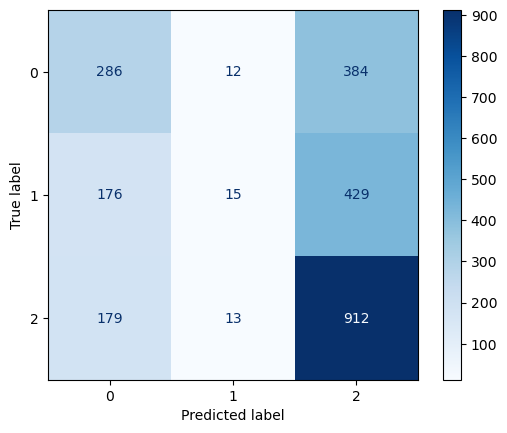

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

#gather the predictions for our test dataset
predictions = lr_model.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=lr_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Asking for predictions

In [63]:
# Define the list of teams
teams = ['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn', 'Norwich City',
         'Aston Villa', 'Sheffield Weds', 'Tottenham', 'Oldham Athletic', 'Liverpool',
         'QPR', 'Arsenal', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
         'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea', 'Southampton',
         'Everton', "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
         'Leicester City', 'Bolton', 'Derby County', 'Sunderland', 'Barnsley',
         'Charlton Ath', 'Bradford City', 'Watford', 'Fulham', 'West Brom',
         'Birmingham City', 'Wolves', 'Portsmouth', 'Wigan Athletic', 'Reading',
         'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
         'Cardiff City', 'Bournemouth', 'Huddersfield', 'Brighton', 'Brentford']

# Prepare the data for prediction
match_data = {}

# Iterate over each team and add columns for playing at home and away
for team in teams:
    match_data[f"{team}Home"] = [0]  # Team not playing at home
    match_data[f"{team}Away"] = [0]  # Team not playing away

# Set Arsenal playing at home and Manchester City playing away
match_data['ArsenalHome'] = [1]
match_data['Manchester CityAway'] = [1]

# Create DataFrame for prediction
match_df = pd.DataFrame(match_data)

# Use the trained model to make a prediction
predicted_outcome = lr_model.predict(match_df)

# Print the predicted outcome
print("Predicted Outcome (FTR):", predicted_outcome)

Predicted Outcome (FTR): [2]


### Actual Outcome: Arsenal 1 - 0 Manchester City. Correct.

In [64]:
# Define the list of teams
teams = ['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn', 'Norwich City',
         'Aston Villa', 'Sheffield Weds', 'Tottenham', 'Oldham Athletic', 'Liverpool',
         'QPR', 'Arsenal', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
         'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea', 'Southampton',
         'Everton', "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
         'Leicester City', 'Bolton', 'Derby County', 'Sunderland', 'Barnsley',
         'Charlton Ath', 'Bradford City', 'Watford', 'Fulham', 'West Brom',
         'Birmingham City', 'Wolves', 'Portsmouth', 'Wigan Athletic', 'Reading',
         'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
         'Cardiff City', 'Bournemouth', 'Huddersfield', 'Brighton', 'Brentford']

# Prepare the data for prediction
match_data = {}

# Iterate over each team and add columns for playing at home and away
for team in teams:
    match_data[f"{team}Home"] = [0]  # Team not playing at home
    match_data[f"{team}Away"] = [0]  # Team not playing away

# Set Everton playing at home and Liverpool playing away
match_data['EvertonHome'] = [1]
match_data['LiverpoolAway'] = [1]

# Create DataFrame for prediction
match_df = pd.DataFrame(match_data)

# Use the trained model to make a prediction
predicted_outcome = lr_model.predict(match_df)

# Print the predicted outcome
print("Predicted Outcome (FTR):", predicted_outcome)

Predicted Outcome (FTR): [0]


## Actual outcome: Everton 2 - 0 Liverpool. Against all odds, Everton was 7x multiplier before the game on sportsbooks. Liverpool was 1.4x. Wrong, but fair prediciton. Odds from Bet365.

In [65]:
# Define the list of teams
teams = ['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn', 'Norwich City',
         'Aston Villa', 'Sheffield Weds', 'Tottenham', 'Oldham Athletic', 'Liverpool',
         'QPR', 'Arsenal', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
         'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea', 'Southampton',
         'Everton', "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
         'Leicester City', 'Bolton', 'Derby County', 'Sunderland', 'Barnsley',
         'Charlton Ath', 'Bradford City', 'Watford', 'Fulham', 'West Brom',
         'Birmingham City', 'Wolves', 'Portsmouth', 'Wigan Athletic', 'Reading',
         'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
         'Cardiff City', 'Bournemouth', 'Huddersfield', 'Brighton', 'Brentford']

# Prepare the data for prediction
match_data = {}

# Iterate over each team and add columns for playing at home and away
for team in teams:
    match_data[f"{team}Home"] = [0]  # Team not playing at home
    match_data[f"{team}Away"] = [0]  # Team not playing away

# Set Arsenal playing at home and Manchester City playing away
match_data['WolvesHome'] = [1]
match_data['BournemouthAway'] = [1]

# Create DataFrame for prediction
match_df = pd.DataFrame(match_data)

# Use the trained model to make a prediction
predicted_outcome = lr_model.predict(match_df)

# Print the predicted outcome
print("Predicted Outcome (FTR):", predicted_outcome)

Predicted Outcome (FTR): [2]


## Actual Outcome: Wolves 0 - 1 Bournemouth. Wrong but another upset according to Bet365. 

In [66]:
# Define the list of teams
teams = ['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn', 'Norwich City',
         'Aston Villa', 'Sheffield Weds', 'Tottenham', 'Oldham Athletic', 'Liverpool',
         'QPR', 'Arsenal', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
         'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea', 'Southampton',
         'Everton', "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
         'Leicester City', 'Bolton', 'Derby County', 'Sunderland', 'Barnsley',
         'Charlton Ath', 'Bradford City', 'Watford', 'Fulham', 'West Brom',
         'Birmingham City', 'Wolves', 'Portsmouth', 'Wigan Athletic', 'Reading',
         'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
         'Cardiff City', 'Bournemouth', 'Huddersfield', 'Brighton', 'Brentford']

# Prepare the data for prediction
match_data = {}

# Iterate over each team and add columns for playing at home and away
for team in teams:
    match_data[f"{team}Home"] = [0]  # Team not playing at home
    match_data[f"{team}Away"] = [0]  # Team not playing away

# Set Arsenal playing at home and Manchester City playing away
match_data['ArsenalHome'] = [1]
match_data['ChelseaAway'] = [1]

# Create DataFrame for prediction
match_df = pd.DataFrame(match_data)

# Use the trained model to make a prediction
predicted_outcome = lr_model.predict(match_df)

# Print the predicted outcome
print("Predicted Outcome (FTR):", predicted_outcome)

Predicted Outcome (FTR): [2]


#### Actual outcome: Arsenal 5 - 0 Chelsea. Correct prediction.

# Want to make a different prediction?

### If you want to make a different prediction, lets say for Fulham vs Crystal Palace, just replace where it says 'ArsenalHome' with 'FulhamHome' and 'ChelseaAway' would be replaced with 'Crystal PalaceAway'. Just make sure that you type out the team name just as it is typed out in the list of teams at the top of the code

In [ ]:
# Define the list of teams
teams = ['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn', 'Norwich City',
         'Aston Villa', 'Sheffield Weds', 'Tottenham', 'Oldham Athletic', 'Liverpool',
         'QPR', 'Arsenal', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
         'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea', 'Southampton',
         'Everton', "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
         'Leicester City', 'Bolton', 'Derby County', 'Sunderland', 'Barnsley',
         'Charlton Ath', 'Bradford City', 'Watford', 'Fulham', 'West Brom',
         'Birmingham City', 'Wolves', 'Portsmouth', 'Wigan Athletic', 'Reading',
         'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
         'Cardiff City', 'Bournemouth', 'Huddersfield', 'Brighton', 'Brentford']

# Prepare the data for prediction
match_data = {}

# Iterate over each team and add columns for playing at home and away
for team in teams:
    match_data[f"{team}Home"] = [0]  # Team not playing at home
    match_data[f"{team}Away"] = [0]  # Team not playing away

# Set Arsenal playing at home and Manchester City playing away
match_data['ArsenalHome'] = [1]
match_data['ChelseaAway'] = [1]

# Create DataFrame for prediction
match_df = pd.DataFrame(match_data)

# Use the trained model to make a prediction
predicted_outcome = lr_model.predict(match_df)

# Print the predicted outcome
print("Predicted Outcome (FTR):", predicted_outcome)